# Analyse d'une base de données des emplyés

## Présentation de la base de données

__L'ensemble de données comprend 4 variables sur 74 employés. Les valeurs sont qualitatives et sont les suivantes:__

- Work_accident: 0 pas d'accident pendant le séjour du salarié, 1 - accident lors du séjour du salarié 
- left: 0 indique que l'employé reste dans l'entreprise, 1 indique - l'employé a quitté l'entreprise 
- sales: indique le département de l'employé (IT, support, marketing, product_mng, sales, hr, management, technical, accounting, RandD)
- salary: indique la catégorie du salaire (low, medium, high)

In [4]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

## Enoncé

__1. Extraire les statistiques sur le jeux de données__

__2. Analyse ACM:__
   - Effectuer une ACM sur le jeu de données. Justifier le nombre de composantes retournées par l'ACM.
   - Afficher les valeurs propres et les ratio de variance expliquée par chaque composante. 
   - Quelle est le nombre de facteurs à garder? justifier le choix.
   - Effectuer l'ACM avec le nombre de facteurs gardés. 
   - Afficher les coordonnées, les contributions et les qualités de représentation des points lignes sur chaque axe. 
   - Tracer le graphique des points lignes sur les deux premières composantes et interpréter le résultats.
   - Afficher les coordonnées, les contributions et les qualités de représentation des points colonnes sur chaque axe.
   - Tracer le graphique des points colonnes sur les deux premières composantes et interprétez le résultats.
   - Est-il intéressant de tracer les graphiques (points lignes et points colonnes) sur les autres dimensions ? Effectuer la démarche le cas échéant, et analyser.

In [5]:
data = pd.read_excel('ACM_data.xls')
data.index = [f'{i+1}' for i in range(len(data.index))]

In [6]:
data

Work accident  Left        sales  salary
1      Work Accident  Stay    technical     low
2   No Work Accident  Stay  product_mng  medium
3   No Work Accident  Stay    technical  medium
4      Work Accident  Left    technical     low
5      Work Accident  Stay   management     low
..               ...   ...          ...     ...
70     Work Accident  Stay    technical  medium
71     Work Accident  Stay        sales     low
72     Work Accident  Stay           IT    high
73     Work Accident  Stay        sales     low
74     Work Accident  Stay  product_mng     low

[74 rows x 4 columns]

In [7]:
data.describe() #donne le nbre de valeur pour chque variable 

Work accident  Left  sales salary
count              74    74     74     74
unique              2     2     10      3
top     Work Accident  Stay  sales    low
freq               65    59     21     38

In [8]:
X = data.values

In [9]:
X #matrice à 2 dimensions

array([['Work Accident', 'Stay', 'technical', 'low'],
       ['No Work Accident', 'Stay', 'product_mng', 'medium'],
       ['No Work Accident', 'Stay', 'technical', 'medium'],
       ['Work Accident', 'Left', 'technical', 'low'],
       ['Work Accident', 'Stay', 'management', 'low'],
       ['Work Accident', 'Stay', 'sales', 'medium'],
       ['Work Accident', 'Stay', 'sales', 'high'],
       ['Work Accident', 'Stay', 'product_mng', 'medium'],
       ['Work Accident', 'Stay', 'marketing', 'medium'],
       ['Work Accident', 'Stay', 'RandD', 'medium'],
       ['Work Accident', 'Stay', 'support', 'medium'],
       ['Work Accident', 'Left', 'product_mng', 'low'],
       ['Work Accident', 'Stay', 'support', 'low'],
       ['Work Accident', 'Stay', 'IT', 'medium'],
       ['No Work Accident', 'Stay', 'sales', 'medium'],
       ['Work Accident', 'Stay', 'management', 'high'],
       ['Work Accident', 'Stay', 'IT', 'medium'],
       ['Work Accident', 'Left', 'sales', 'low'],
       ['Work Acc

In [10]:
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values) #on créer l'objet qui permet de faire l'ACM, la classe MCA importée préalablement fait l'ACM, puis on crée un objet de cette classe

In [11]:
my_mca.fit(X) #la fonction fit fait l'ACM : calcule les différents axes et les caractéristiques des axes

MCA(row_labels=array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74'], dtype=object),
    var_labels=array(['Work accident', ' Left', 'sales', 'salary'], dtype=object))

In [ ]:
# l'objet my_mca a plusieurs attributs,notamment eig qui affiche les valeurs propres

In [12]:
print(my_mca.eig_) 

[[  0.41867368   0.39901338   0.301029     0.27856484   0.25
    0.25         0.25         0.25         0.25         0.20998899
    0.14898324   0.13799968   0.10574719]
 [ 12.88226714  12.27733473   9.26243076   8.57122597   7.69230769
    7.69230769   7.69230769   7.69230769   7.69230769   6.4611996
    4.58409959   4.24614404   3.2537597 ]
 [ 12.88226714  25.15960187  34.42203263  42.99325861  50.6855663
   58.37787399  66.07018168  73.76248937  81.45479707  87.91599667
   92.50009625  96.7462403  100.        ]]


In [16]:
print("La matrice eig_:", my_mca.eig_) 
print("les valeurs propres de chaque axe : \n")
for i in range(len(my_mca.eig_[0])):
    print(f'La valeur propre de l axe {i+1} est : {my_mca.eig_[0][i]}')

La matrice eig_: [[  0.41867368   0.39901338   0.301029     0.27856484   0.25
    0.25         0.25         0.25         0.25         0.20998899
    0.14898324   0.13799968   0.10574719]
 [ 12.88226714  12.27733473   9.26243076   8.57122597   7.69230769
    7.69230769   7.69230769   7.69230769   7.69230769   6.4611996
    4.58409959   4.24614404   3.2537597 ]
 [ 12.88226714  25.15960187  34.42203263  42.99325861  50.6855663
   58.37787399  66.07018168  73.76248937  81.45479707  87.91599667
   92.50009625  96.7462403  100.        ]]
les valeurs propres de chaque axe : 

La valeur propre de l axe 1 est : 0.4186736819819777
La valeur propre de l axe 2 est : 0.3990133787745393
La valeur propre de l axe 3 est : 0.301028999760906
La valeur propre de l axe 4 est : 0.2785648441671124
La valeur propre de l axe 5 est : 0.2500000000000002
La valeur propre de l axe 6 est : 0.2500000000000001
La valeur propre de l axe 7 est : 0.2500000000000001
La valeur propre de l axe 8 est : 0.2500000000000001
L

In [18]:
print("les valeurs propres en pourcentage de la variance totale : \n")
for i in range(len(my_mca.eig_[1])):
    print(f'La valeur propre de l\'axe {i+1} est : {my_mca.eig_[1][i]} %')

les valeurs propres en pourcentage de la variance totale : 

La valeur propre de l'axe 1 est : 12.882267137907004 %
La valeur propre de l'axe 2 est : 12.277334731524283 %
La valeur propre de l'axe 3 est : 9.26243076187403 %
La valeur propre de l'axe 4 est : 8.571225974372688 %
La valeur propre de l'axe 5 est : 7.692307692307698 %
La valeur propre de l'axe 6 est : 7.692307692307694 %
La valeur propre de l'axe 7 est : 7.692307692307694 %
La valeur propre de l'axe 8 est : 7.692307692307694 %
La valeur propre de l'axe 9 est : 7.692307692307689 %
La valeur propre de l'axe 10 est : 6.461199598528752 %
La valeur propre de l'axe 11 est : 4.5840995886492255 %
La valeur propre de l'axe 12 est : 4.246144043181341 %
La valeur propre de l'axe 13 est : 3.253759702424202 %


In [19]:
print("les valeurs propres en pourcentage cumulé de la variance totale : \n")
for i in range(len(my_mca.eig_[2])): #ici eig est un attribut car pas de parenthèses
    print(f'La valeur propre de l\'axe {i+1} est : {my_mca.eig_[2][i]} %')

les valeurs propres en pourcentage cumulé de la variance totale : 

La valeur propre de l'axe 1 est : 12.882267137907004 %
La valeur propre de l'axe 2 est : 25.159601869431285 %
La valeur propre de l'axe 3 est : 34.42203263130531 %
La valeur propre de l'axe 4 est : 42.993258605678 %
La valeur propre de l'axe 5 est : 50.6855662979857 %
La valeur propre de l'axe 6 est : 58.377873990293395 %
La valeur propre de l'axe 7 est : 66.07018168260109 %
La valeur propre de l'axe 8 est : 73.76248937490878 %
La valeur propre de l'axe 9 est : 81.45479706721648 %
La valeur propre de l'axe 10 est : 87.91599666574523 %
La valeur propre de l'axe 11 est : 92.50009625439445 %
La valeur propre de l'axe 12 est : 96.7462402975758 %
La valeur propre de l'axe 13 est : 100.0 %


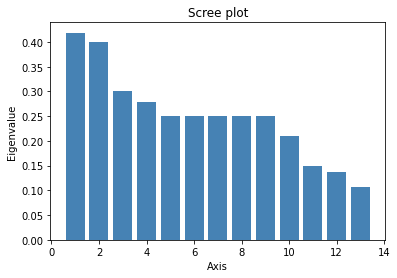

In [21]:
my_mca.plot_eigenvalues() #affichage avec un graph ici eig est une fct car parentheses à la fin 

In [23]:
print("La moyenne des valeurs propres : \n", np.average(my_mca.eig_[0]))
print("La moyenne des valeurs propres est aussi égale à 1/p : \n", 1/4)
print("On retient donc 8 facteurs")  #car pour 8 facteurs le pourcentage cumulé de la variance totale est environ 73%
#Aussi on compare la valeur propre de l'axe à la moyenne si c'est supérieur on le conserve sinon non. Comme ça on sait cbn de facteurs retenir. Ici les 8 premiers axes.

La moyenne des valeurs propres : 
 0.25
La moyenne des valeurs propres est aussi égale à 1/p : 
 0.25
On retient donc 8 facteurs


In [24]:
# On refait le calcul en gardant uniquement 8 facteurs

In [25]:
#Instanciation
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values[0:6],n_components=8) #n_components=8 pour indiquer qu'on prend juste 8 facteurs
#Calcul
my_mca.fit(X) 

MCA(n_components=8,
    row_labels=array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74'], dtype=object),
    var_labels=array(['Work accident', ' Left', 'sales', 'salary'], dtype=object))

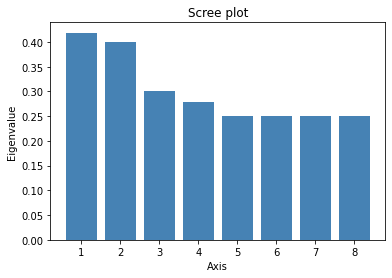

[[ 0.41867368  0.39901338  0.301029    0.27856484  0.25        0.25
   0.25        0.25      ]
 [12.88226714 12.27733473  9.26243076  8.57122597  7.69230769  7.69230769
   7.69230769  7.69230769]
 [12.88226714 25.15960187 34.42203263 42.99325861 50.6855663  58.37787399
  66.07018168 73.76248937]]


In [26]:
my_mca.plot_eigenvalues()
print(my_mca.eig_) #affiche : valeur propres, poucentage et pourcentages cumulés des 8 axes

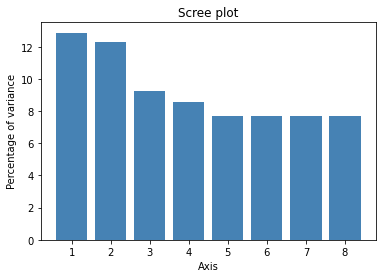

In [27]:
my_mca.plot_eigenvalues(type="percentage") #affiche la 2e ligne

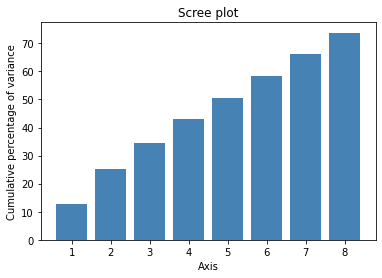

In [28]:
my_mca.plot_eigenvalues(type="cumulative") #affiche la 3e ligne

In [29]:
#Extraction des statistiques sur les points lignes
#Lors de l'exécution de la méthode my_mca.fit(X), les statistiques suivantes sont calculées :
#my_mca.row_contrib_ : contributions des points lignes à la variance de l'axe
#my_mca.col_contrib_ : contributions des points colonnes à la variance de l'axe
#my_mca.row_cos2_ : cosinus carrés des points lignes
#my_mca.col_cos2_ : cosinus carrés des points colonnes

df_rows = my_mca.row_topandas()
df_rows #caractéristique points lignes (numéro de l'employé)

row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
1        -0.302886        0.039675        0.003860       -0.291732   
2         0.540536       -1.243149        0.757534       -0.744000   
3         0.417859       -0.950990        0.491827       -0.873193   
4        -1.012030        0.277302        0.016665       -0.650415   
5         0.514458        0.968120        0.070470        0.022530   
..             ...             ...             ...             ...   
70        0.142997       -0.301729       -0.273546       -0.643722   
71       -0.125739        0.014809        0.373874        0.649383   
72        0.722142        0.832384        0.111487        0.102018   
73       -0.125739        0.014809        0.373874        0.649383   
74       -0.180209       -0.252484        0.269567       -0.162538   

    row_coord_dim5  row_coord_dim6  row_coord_dim7  row_coord_dim8  \
1         0.423007       -0.340521        0.539746        0.056686   
2        -0.324671        0.592906       -0.640552        0.437056   
3         0.423007       -0.340521        0.539746        0.056686   
4         0.423007       -0.340521        0.539746        0.056686   
5        -0.055416        0.116502       -0.206357        0.017563   
..             ...             ...             ...             ...   
70        0.423007       -0.340521        0.539746        0.056686   
71        0.002336       -0.189641       -0.042035       -0.430272   
72       -0.206016        0.253794        0.369752        0.733606   
73        0.002336       -0.189641       -0.042035       -0.430272   
74       -0.324671        0.592906       -0.640552        0.437056   

    row_contrib_dim1  row_contrib_dim2  ...  row_contrib_dim7  \
1           0.296108          0.005331  ...          1.574733   
2           0.943064          5.233917  ...          2.217878   
3           0.563575          3.062900  ...          1.574733   
4           3.305819          0.260427  ...          1.574733   
5           0.854265          3.174237  ...          0.230180   
..               ...               ...  ...               ...   
70          0.066001          0.308328  ...          1.574733   
71          0.051031          0.000743  ...          0.009551   
72          1.683207          2.346543  ...          0.739008   
73          0.051031          0.000743  ...          0.009551   
74          0.104820          0.215898  ...          2.217878   

    row_contrib_dim8  row_cos2_dim1  row_cos2_dim2  row_cos2_dim3  \
1           0.017369       0.065228       0.001119       0.000011   
2           1.032529       0.067286       0.355896       0.132154   
3           0.017369       0.052102       0.269863       0.072180   
4           0.017369       0.440287       0.033056       0.000119   
5           0.001667       0.083535       0.295819       0.001567   
..               ...            ...            ...            ...   
70          0.017369       0.012939       0.057609       0.047350   
71          1.000726       0.016367       0.000227       0.144707   
72          2.909073       0.123483       0.164062       0.002943   
73          1.000726       0.016367       0.000227       0.144707   
74          1.032529       0.013545       0.026589       0.030309   

    row_cos2_dim4  row_cos2_dim5  row_cos2_dim6  row_cos2_dim7  row_cos2_dim8  
1        0.060512       0.127225       0.082445       0.207136       0.002285  
2        0.127474       0.024275       0.080956       0.094490       0.043990  
3        0.227517       0.053393       0.034600       0.086930       0.000959  
4        0.181857       0.076921       0.049847       0.125236       0.001381  
5        0.000160       0.000969       0.004284       0.013440       0.000097  
..            ...            ...            ...            ...            ...  
70       0.262212       0.113227       0.073374       0.184346       0.002033  
71       0.436555       0.000006       0.037231       0.001829       0.1

In [30]:
# Coordonnées des points lignes
print(my_mca.row_coord_) #matrice à 2 dimension qui contient les coordonnes de chaque ligne pour les 8 premières dimensions

[[-3.02885743e-01  3.96746688e-02  3.85988978e-03 -2.91731882e-01
   4.23006787e-01 -3.40521333e-01  5.39745875e-01  5.66856434e-02]
 [ 5.40535675e-01 -1.24314854e+00  7.57534039e-01 -7.43999961e-01
  -3.24670599e-01  5.92906444e-01 -6.40552423e-01  4.37055879e-01]
 [ 4.17858669e-01 -9.50990029e-01  4.91827320e-01 -8.73193376e-01
   4.23006787e-01 -3.40521333e-01  5.39745875e-01  5.66856434e-02]
 [-1.01202969e+00  2.77301730e-01  1.66652766e-02 -6.50415041e-01
   4.23006787e-01 -3.40521333e-01  5.39745875e-01  5.66856434e-02]
 [ 5.14458149e-01  9.68120158e-01  7.04703735e-02  2.25300279e-02
  -5.54157121e-02  1.16502314e-01 -2.06357110e-01  1.75631578e-02]
 [ 3.20143907e-01 -3.26594244e-01  9.64688150e-02  2.97393214e-01
   2.33578125e-03 -1.89641150e-01 -4.20347346e-02 -4.30272385e-01]
 [ 6.37378659e-01  7.81062421e-01  4.66030491e-01  2.84549006e-01
   2.33578125e-03 -1.89641150e-01 -4.20347346e-02 -4.30272385e-01]
 [ 2.65674177e-01 -5.93887066e-01 -7.83906013e-03 -5.14528548e-01
  -

In [31]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[2.96108096e-01 5.33098477e-03 6.68820769e-05 4.12866610e-01
  9.67214821e-01 6.26782584e-01 1.57473302e+00 1.73689847e-02]
 [9.43064385e-01 5.23391744e+00 2.57610908e+00 2.68526901e+00
  5.69789177e-01 1.90020568e+00 2.21787787e+00 1.03252887e+00]
 [5.63574651e-01 3.06289952e+00 1.08588852e+00 3.69881695e+00
  9.67214821e-01 6.26782584e-01 1.57473302e+00 1.73689847e-02]
 [3.30581941e+00 2.60426984e-01 1.24676613e-03 2.05221627e+00
  9.67214821e-01 6.26782584e-01 1.57473302e+00 1.73689847e-02]
 [8.54265209e-01 3.17423700e+00 2.22932348e-02 2.46243872e-03
  1.65994656e-02 7.33664280e-02 2.30179767e-01 1.66737574e-03]
 [3.30813405e-01 3.61241699e-01 4.17766712e-02 4.29046222e-01
  2.94912110e-05 1.94398734e-01 9.55091302e-03 1.00072608e+00]
 [1.31125650e+00 2.06610462e+00 9.74964066e-01 3.92786110e-01
  2.94912110e-05 1.94398734e-01 9.55091302e-03 1.00072608e+00]
 [2.27819716e-01 1.19450661e+00 2.75859495e-04 1.28428357e+00
  5.69789177e-01 1.90020568e+00 2.21787787e+00 1.03252887e+00]


In [32]:
 # Cos2 des points lignes
print(my_mca.row_cos2_) 

[[6.52281094e-02 1.11918981e-03 1.05931942e-05 6.05124748e-02
  1.27224807e-01 8.24452762e-02 2.07136098e-01 2.28466900e-03]
 [6.72861972e-02 3.55896161e-01 1.32154380e-01 1.27474431e-01
  2.42752205e-02 8.09561041e-02 9.44901666e-02 4.39897194e-02]
 [5.21015931e-02 2.69863468e-01 7.21800984e-02 2.27516572e-01
  5.33933096e-02 3.46003761e-02 8.69302310e-02 9.58822753e-04]
 [4.40286972e-01 3.30563187e-02 1.19391767e-04 1.81857191e-01
  7.69208366e-02 4.98468796e-02 1.25235655e-01 1.38132378e-03]
 [8.35347025e-02 2.95818517e-01 1.56740048e-03 1.60210246e-04
  9.69242982e-04 4.28386654e-03 1.34401991e-02 9.73580882e-05]
 [8.99178811e-02 9.35777581e-02 8.16449770e-03 7.75921330e-02
  4.78652045e-06 3.15515532e-02 1.55014456e-03 1.62421131e-01]
 [1.45525008e-01 2.18531518e-01 7.77985067e-02 2.90039230e-02
  1.95437065e-06 1.28827256e-02 6.32935150e-04 6.63177135e-02]
 [2.74492769e-02 1.37163941e-01 2.38979260e-05 1.02955884e-01
  4.09937968e-02 1.36711347e-01 1.59566447e-01 7.42858595e-02]


In [33]:
#Extraction des statistiques sur les points colonnes
df_cols = my_mca.col_topandas()
df_cols 

col_coord_dim1  col_coord_dim2  \
Work accident_No Work Accident        0.624875       -1.440970   
Work accident_Work Accident          -0.086521        0.199519   
 Left_Left                           -1.463364        0.478707   
 Left_Stay                            0.372042       -0.121705   
sales_IT                              0.258612       -0.027812   
sales_RandD                          -1.045438        0.107036   
sales_accounting                      1.169964       -1.120233   
sales_hr                             -2.354057        0.998534   
sales_management                      1.696186        2.251245   
sales_marketing                      -0.365350       -0.144793   
sales_product_mng                    -0.101751       -0.832856   
sales_sales                           0.039228       -0.157487   
sales_support                         0.436913       -0.499994   
sales_technical                      -0.419263       -0.094659   
salary_high                           1.324915        2.053184   
salary_low                           -0.650186        0.117091   
salary_medium                         0.503848       -0.745533   

                                col_coord_dim3  col_coord_dim4  \
Work accident_No Work Accident        1.475431       -0.425533   
Work accident_Work Accident          -0.204290        0.058920   
 Left_Left                            0.022407       -0.603746   
 Left_Stay                           -0.005697        0.153495   
sales_IT                              0.043917        0.408745   
sales_RandD                          -1.429797       -1.516867   
sales_accounting                     -2.989964       -1.455033   
sales_hr                              0.084476        0.630428   
sales_management                      0.156150       -0.529295   
sales_marketing                      -1.464217        0.139980   
sales_product_mng                     0.593095       -0.920006   
sales_sales                           0.822014        0.794099   
sales_support                        -1.711685        1.332275   
sales_technical                       0.009964       -1.192755   
salary_high                           0.410744       -0.405782   
salary_low                            0.208494        0.364445   
salary_medium                        -0.400312       -0.378666   

                                col_coord_dim5  col_coord_dim6  \
Work accident_No Work Accident    5.296798e-16    2.984531e-17   
Work accident_Work Accident       5.781518e-16    3.226538e-17   
 Left_Left                        3.880231e-15   -2.994854e-16   
 Left_Stay                        2.364299e-15    2.277345e-16   
sales_IT                         -4.120310e-01    5.075888e-01   
sales_RandD                      -6.278325e-01    3.293847e+00   
sales_accounting                 -5.608857e+00   -4.482507e+00   
sales_hr                         -1.926778e+00   -2.880897e-01   
sales_management                 -1.108314e-01    2.330046e-01   
sales_marketing                   1.948019e+00   -1.053822e+00   
sales_product_mng                -6.493412e-01    1.185813e+00   
sales_sales                       4.671562e-03   -3.792823e-01   
sales_support                     2.952077e-01    7.898077e-01   
sales_technical                   8.460136e-01   -6.810427e-01   
salary_high                      -2.159548e-15    1.020450e-15   
salary_low                       -2.304625e-15    1.074248e-16   
salary_medium                    -7.419644e-16   -1.236906e-16   

                                col_coord_dim7  col_coord_dim8  \
Work accident_No Work Accident    2.221503e-16   -2.487109e-18   
Work accident_Work Accident       2.894502e-16   -9.951563e-18   
 Left_Left                        6.430753e-16   -1.154920e-15   
 Left_Stay                        1.248461e-15    3.109282e-16   
sales_IT                          7.395041e-01    1.467213e+00   
sales_RandD                       7.149137e-02   -3.781836e+00   
sal

In [34]:
 # Coordonnées des points colonnes
print(my_mca.col_coord_)

[[ 6.24875315e-01 -1.44097016e+00  1.47543129e+00 -4.25533122e-01
   5.29679771e-16  2.98453112e-17  2.22150285e-16 -2.48710926e-18]
 [-8.65211975e-02  1.99518945e-01 -2.04290486e-01  5.89199707e-02
   5.78151848e-16  3.22653815e-17  2.89450243e-16 -9.95156300e-18]
 [-1.46336450e+00  4.78707145e-01  2.24066614e-02 -6.03746217e-01
   3.88023085e-15 -2.99485377e-16  6.43075267e-16 -1.15492011e-15]
 [ 3.72041821e-01 -1.21705206e-01 -5.69660884e-03  1.53494801e-01
   2.36429944e-15  2.27734521e-16  1.24846105e-15  3.10928239e-16]
 [ 2.58611519e-01 -2.78117934e-02  4.39171594e-02  4.08744785e-01
  -4.12031003e-01  5.07588753e-01  7.39504068e-01  1.46721299e+00]
 [-1.04543795e+00  1.07035538e-01 -1.42979658e+00 -1.51686704e+00
  -6.27832524e-01  3.29384677e+00  7.14913688e-02 -3.78183626e+00]
 [ 1.16996430e+00 -1.12023343e+00 -2.98996352e+00 -1.45503307e+00
  -5.60885729e+00 -4.48250666e+00 -3.81313116e-01 -1.27195400e+00]
 [-2.35405662e+00  9.98533568e-01  8.44760676e-02  6.30427722e-01
  -

In [35]:
# Contributions des points colonnes
print(my_mca.col_contrib_)

[[2.83571039e+00 1.58224348e+01 2.19877324e+01 1.97647457e+00
  3.41222425e-30 1.08333559e-32 6.00211812e-31 7.52316385e-35]
 [3.92636823e-01 2.19079866e+00 3.04445525e+00 2.73665710e-01
  2.93606370e-29 9.14440067e-32 7.35918082e-30 8.69889783e-33]
 [2.59196370e+01 2.91039483e+00 8.45172809e-03 6.63104670e+00
  3.05193071e-28 1.81807076e-30 8.38268513e-30 2.70373067e-29]
 [6.58973822e+00 7.39930888e-01 2.14874443e-03 1.68585933e+00
  4.45682162e-28 4.13502392e-30 1.24271140e-28 7.70798082e-30]
 [4.31736080e-01 5.23924621e-03 1.73164325e-02 1.62097539e+00
  1.83534646e+00 2.78536586e+00 5.91206775e+00 2.32725834e+01]
 [1.76383984e+00 1.94002272e-02 4.58858160e+00 5.58093558e+00
  1.06533426e+00 2.93227745e+01 1.38135562e-02 3.86548257e+01]
 [1.10453085e+00 1.06252191e+00 1.00330212e+01 2.56760204e+00
  4.25125406e+01 2.71525216e+01 1.96486071e-01 2.18630672e+00]
 [1.34149078e+01 2.53260479e+00 2.40263936e-02 1.44601848e+00
  1.50505636e+01 3.36468839e-01 2.54217492e-01 5.27600426e+00]


In [36]:
 # Cos2 des points colonnes
print(my_mca.col_cos2_)

[[5.40649606e-02 2.87500846e-01 3.01416576e-01 2.50723991e-02
  3.88468606e-32 1.23333591e-34 6.83318063e-33 8.56483269e-37]
 [5.40649606e-02 2.87500846e-01 3.01416576e-01 2.50723991e-02
  2.41409682e-30 7.51872944e-33 6.05088201e-31 7.15242711e-34]
 [5.44432793e-01 5.82611519e-02 1.27641986e-04 9.26719052e-02
  3.82784529e-30 2.28029214e-32 1.05138763e-31 3.39111982e-31]
 [5.44432793e-01 5.82611519e-02 1.27641986e-04 9.26719052e-02
  2.19869866e-29 2.03994514e-31 6.13070959e-30 3.80260387e-31]
 [8.10665669e-03 9.37570731e-05 2.33783865e-04 2.02511878e-02
  2.05781269e-02 3.12298596e-02 6.62868203e-02 2.60935026e-01]
 [3.03594588e-02 3.18239064e-04 5.67866187e-02 6.39134897e-02
  1.09492688e-02 3.01372960e-01 1.41972661e-04 3.97285708e-01]
 [1.87509106e-02 1.71907253e-02 1.22464135e-01 2.90016609e-02
  4.30949042e-01 2.75244739e-01 1.99177661e-03 2.21625613e-02]
 [2.34151377e-01 4.21296881e-02 3.01529831e-04 1.67932020e-02
  1.56865029e-01 3.50685832e-03 2.64959077e-03 5.49893401e-02]


In [37]:
# Représentation graphique

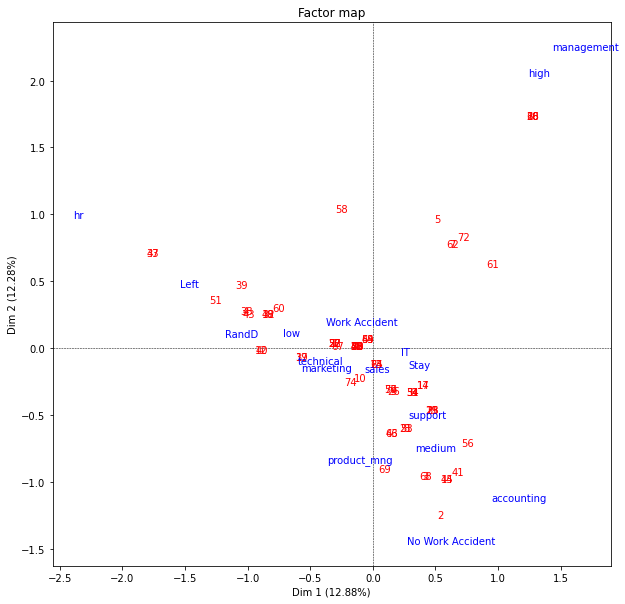

In [38]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2,figsize=(10,10))

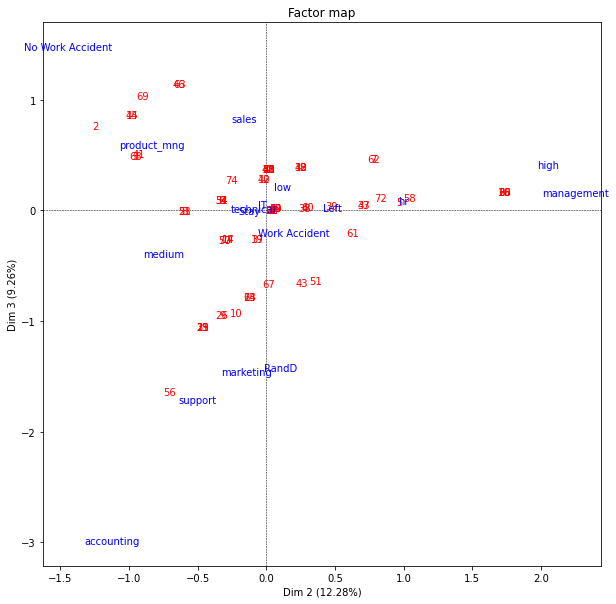

In [39]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 2 et 3 qui sont ici représentés
my_mca.mapping(num_x_axis=2, num_y_axis=3,figsize=(10,10))

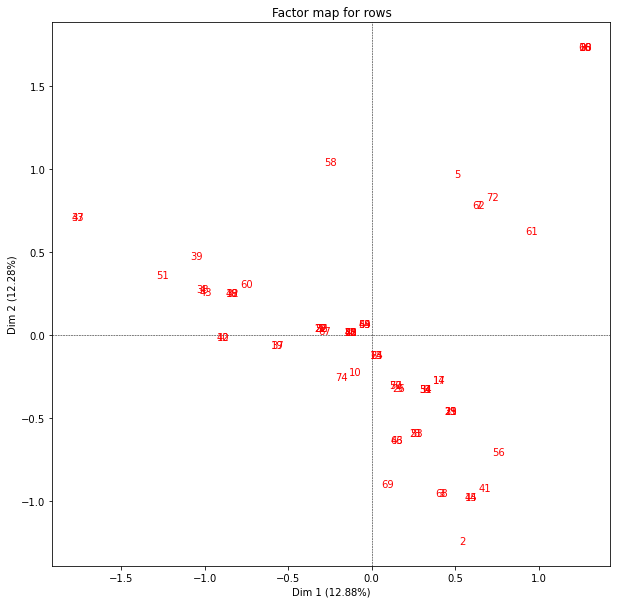

In [40]:
# Mapping des points lignes (row pour les employés)
my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))
#on ne voit pas très bien car les numéros se supperposent
# L'employé 61 et 51 sont opposé par rapport au 1er axe, diffèrent bcp par rapport au 1er axe
# L'employé 1 et 22 sont très proches ils ont  les mêmes valeurs dans le data frame ['Work Accident', 'Stay', 'technical', 'low']
# L'employé 47 (['No Work Accident', 'Stay', 'IT', 'medium']) une bonne qualité de representation sur l'axe 1 (très proche, presque dessus)

In [42]:
data.values[40]

array(['No Work Accident', 'Stay', 'IT', 'medium'], dtype=object)

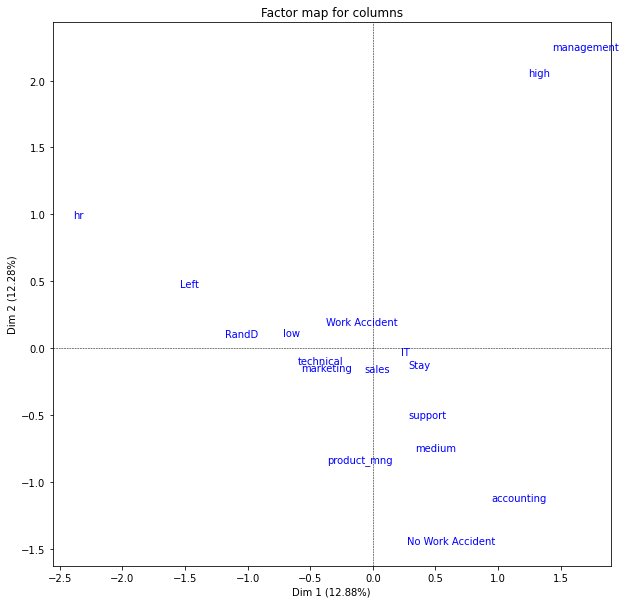

In [43]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))
#figsize=(10,10) pour gérer la taille
# travailler en management et avoir un salaire élevé (high) vont presque toujours ensemble (très proche sur le grphe)
# No Work Accident loin du centre donc c'est une modalité plutôt rare (apparait que 9 fois sur 74 employés)

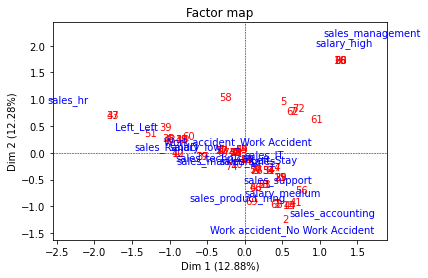

In [45]:
#combine les points lignes (rouge) et colonnes (bleu)
#les individus sont entourés par leurs modalitées 
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)

In [47]:
data.values[1] #par exemple les employés 1, 69 et 56 sont proches de salaire moyen

array(['No Work Accident', 'Stay', 'product_mng', 'medium'], dtype=object)

In [48]:
data.values[69]

array(['Work Accident', 'Stay', 'technical', 'medium'], dtype=object)

In [49]:
data.values[56]

array(['Work Accident', 'Stay', 'technical', 'medium'], dtype=object)

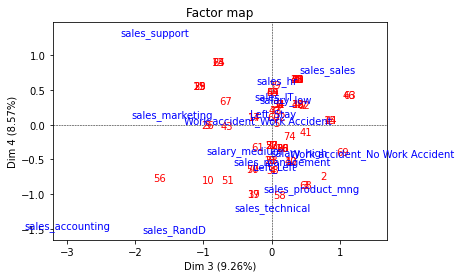

In [56]:
# il n'est pas très intéressant de tracer les graphiques (points lignes et points colonnes) sur les autres dimensions car leur valeurs propres ne sont pas très élévées


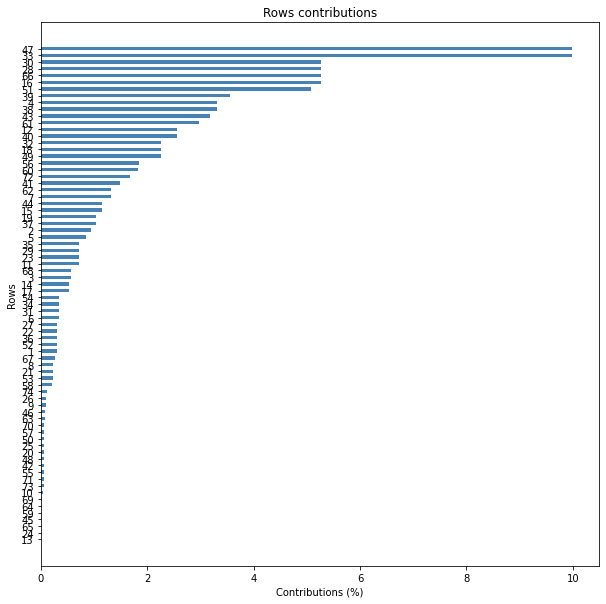

In [50]:
# Classement des points lignes (employés) en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_mca.plot_row_contrib(num_axis=1,figsize=(10,10))

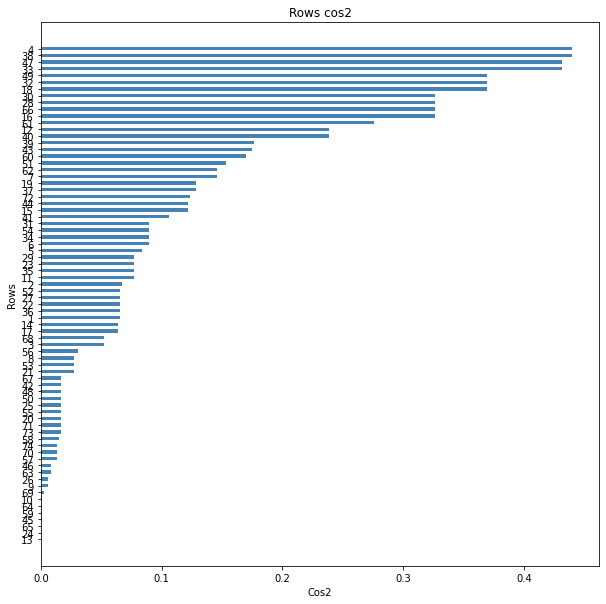

In [51]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_mca.plot_row_cos2(num_axis=1,figsize=(10,10))

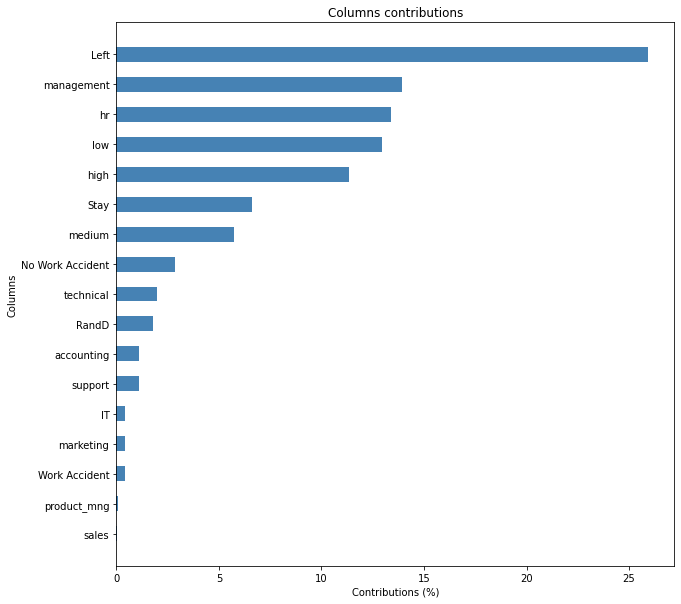

In [52]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_contrib(num_axis=1,figsize=(10,10))

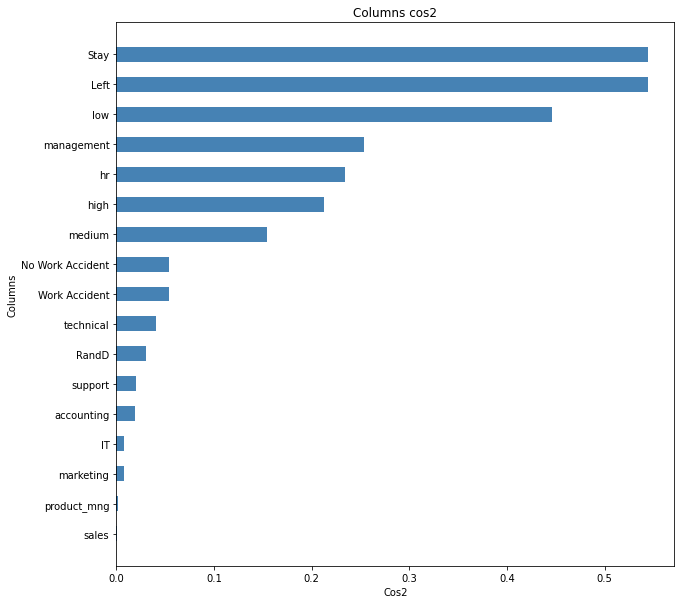

In [53]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_mca.plot_col_cos2(num_axis=1,figsize=(10,10))